### 환경에 따른 주택 가격 예측하기

 ##### 데이터 수집, 준비 및 탐색

import pandas as pd
import numpy as np

data_url = "C:/DataMining/housePrice/housing.csv"

#빈칸 기준으로 분리, 22줄 건너뜀
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

#데이터가 두 줄씩 있으며, 짝수줄과 홀수줄 추출 후 합치기
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

raw_df.head()

#독립 변수 X가 되는 피처들을 DataFrame 자료형으로 변환하여 boston_df를 생성
boston_df = pd.DataFrame(raw_df, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT', 'PRICE'])

#종속 변수인 주택 가격(‘PRICE’) 컬럼을 boston_df에 추가
boston_df['PRICE'] = target
boston_df.head()

In [59]:
import pandas as pd
import numpy as np

data_url = "C:/DataMining/housePrice/housing.csv"

data = pd.read_csv(data_url,sep="\s+", header=None)

# 컬럼 이름 지정
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
data.columns = column_names

In [60]:
boston_df = pd.DataFrame(data,  columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT', 'PRICE'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
#행의 개수(데이터 개수)와 열의 개수(변수 개수)를 확인 => 데이터 506개, 변수 14개
#변수 중 13개는 독립 변수 X, 마지막 변수 price는 종속 변수 y
print('보스톤 주택 가격 데이터셋 크기: ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기:  (506, 14)


In [62]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


##### 분석 모델 구축, 결과 분석 및 시각화

1. 선형 회귀를 이용해 분석 모델 구축하기

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
#PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 PRICE를 제외 drop한 나머지 피처를 독립 변수 X로 설정
Y = boston_df['PRICE']

#열 삭제, False이면 명령어를 실행한 후 메소드가 적용된 데이터 프레임을 기존 데이터 프레임으로 대체
X = boston_df.drop(['PRICE'], axis = 1, inplace = False)

In [66]:
#훈련용 데이터와 평가용 데이터 분할하기 => ]: X와 Y 데이터 506개를 학습 데이터와 평가 데이터로 7:3 비율로 분할
#데이터를 섞기 위한 임의의 값
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [67]:
#선형 회귀 분석 : 모델 생성 -> 최소자승법(OLS)사용
lr = LinearRegression()

In [68]:
#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [69]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석

In [70]:
mse = mean_squared_error(Y_test, Y_predict) #제곱근 계산 후
rmse = np.sqrt(mse) #평균 제곱 오차(RMSE)구하기


print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse)) 
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [71]:
#선형 회귀의 Y절편과 각 피처의 회귀 계수 확인
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.99559517216443
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [73]:
#회귀 계수값(if.conf)과 피처 이름을 묶어 Series 자료형으로 만든 후, 회귀 계수 값을 기준으로 내림차순
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns) #데이터프레임 X의 컬럼명을 끌어옴
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

회귀 모델 결과를 토대로 보스톤 주택 가격에 대한 회귀식

YPRICE = -0.11XCRIM + 0.07XZN + 0.03XINDUS + 3.05XCHAS – 19.80XNOX + 3.35XRM + 0.01XAGE - 1.74XDIS + 0.36XRAD - 0.01XTAX - 0.92XPTRATIO + 0.01XB - 0.57XLSTAT + 41.00

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

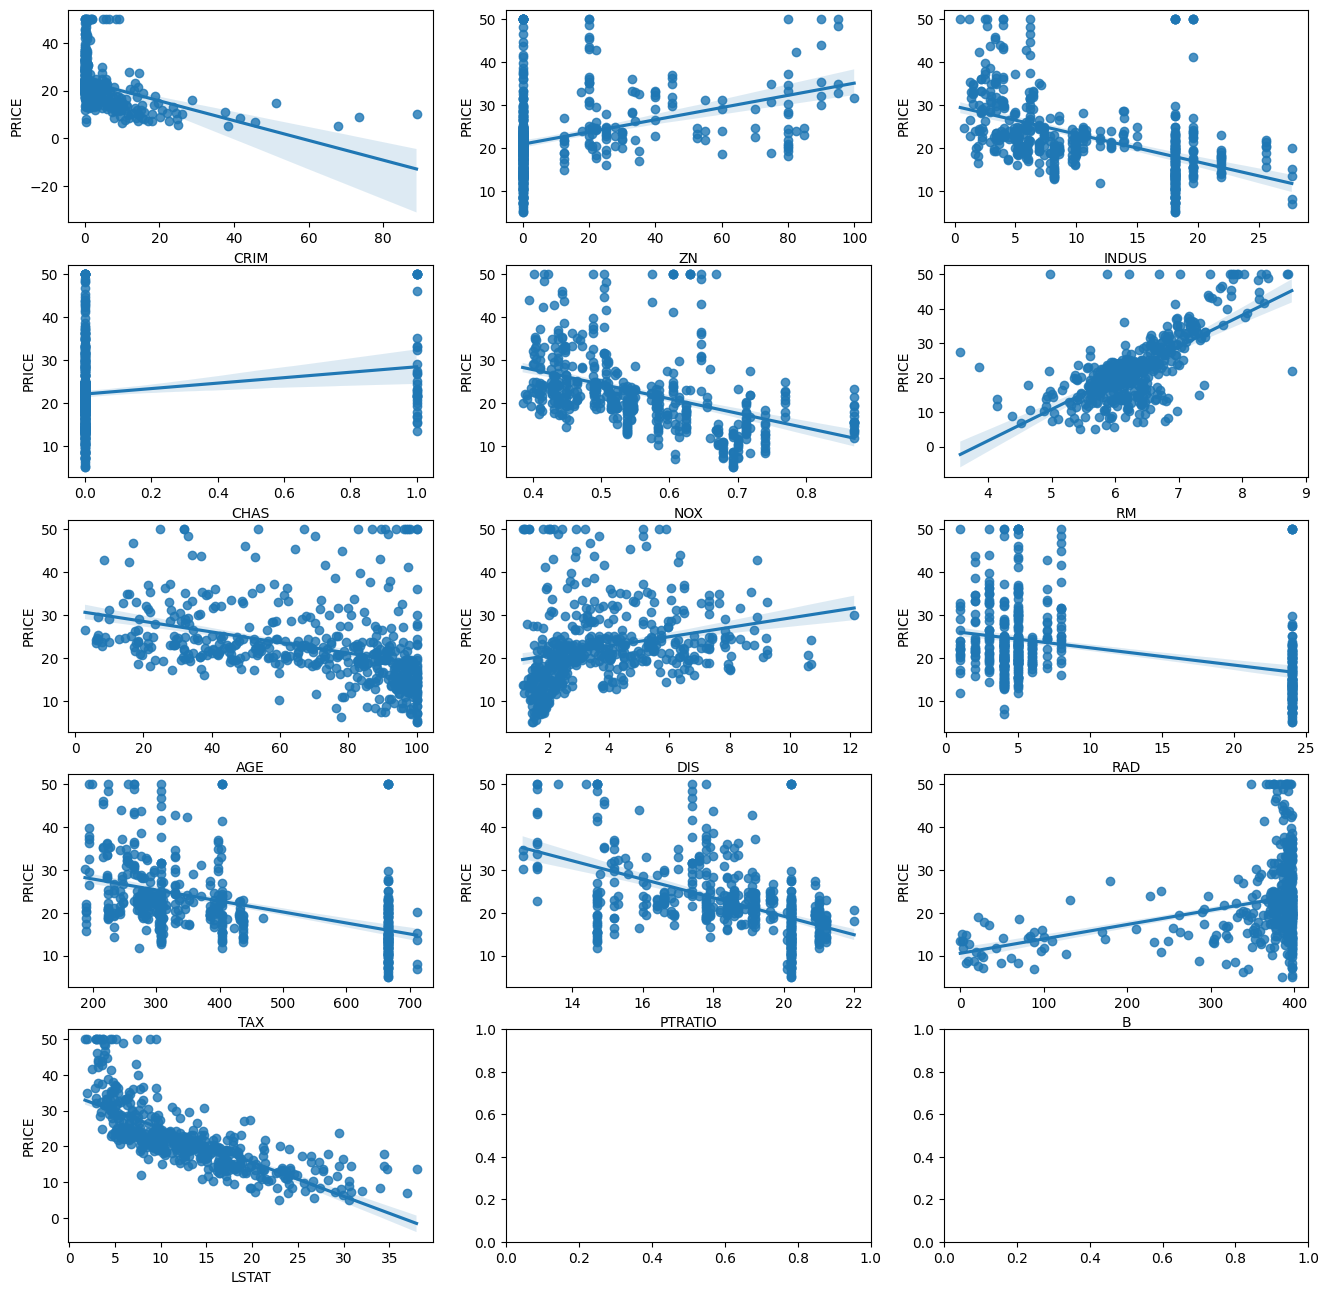

In [78]:
#독립 변수인 13개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는 13개 그래프를 
#subplots()를 사용하여 5행 3열 구조로 모아서 나타냄

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
   row = int(i/3)
   col = i%3
   sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
#sns.regplot(x='독립변수열이름', y='종속변수열이름', data=데이터프레임객체)